## Datos numéricos y categóricos

Normalmente usados para explorar/describir 

#### ¿Cuánto espacio de mi universo muestral ocupa cierta categoria/grupo conforme a mis datos?

La gráfica más choteada (Definir choteada en todos los países) es la Bar Graph o Bar Plot o por ejemplo seaborn le dice CountPlot y ésta es la version Categorica de un histograma 🤓

> A bar graph shows comparisons among discrete categories.



> Wikipedia

> [Canal de Youtube de Sidney](https://www.youtube.com/channel/UCVQJZE_on7It_pEv6tn-jdA) (De donde se obtienen los datos a analizar)

### BARCHART

In [2]:
import pandas as pd
import numpy as np

import json
import datetime
import math

from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import seaborn as sns

In [3]:
df = pd.read_pickle('data/sydney.pkl')
df.shape
df

,title,posted_ago,length,views,link,calories,date,days_since_posted,title_word_set,area,workout_type,is_butt_area,is_core_area,is_booti_area,is_shoulder_area,is_lower_area,is_bicep_area,is_glute_area,is_back_area,is_chest_area,is_hip_area,is_upper_area,is_leg_area,is_full_area,is_tricep_area,is_ab_area,is_total_area,is_arm_area,is_hamstr_area,is_thigh_area,is_stretch_workout,is_pilat_workout,is_hiit_workout,is_yoga_workout,is_tabata_workout,is_strength_workout,is_cardio_workout,title_contains_plyo,title_contains_bootcamp,title_contains_resistance,title_contains_agility,title_contains_bodyweight,title_contains_circuit,title_contains_conditioning,title_contains_athlete,title_contains_speed,title_contains_toning,title_contains_boxing,title_contains_sport,title_contains_sculpt,title_contains_tone,title_contains_kickboxing,title_contains_workout,title_contains_boot camp,title_contains_burnout,title_contains_toned,title_contains_superset,num_body_areas,num_workout_types,num_other_keywords
0,30 Minute HIIT Workout 🔥Burn 500 Calories! 🔥,1 year,31.0,197591,/watch?v=Mcpyp9PRtU8,500.0,2018-02-01,711.0,"{workout, !, 🔥, 🔥burn, 500, 30, calori, hiit, ...",full,hiit,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1,2,1
1,30 Minute HIIT Tabata Workout Sydney Cummings,1 year,31.0,75863,/watch?v=m40O_U8_4UE,NaN,2018-02-06,706.0,"{tabata, workout, sydney, 30, hiit, minut, cum}",full,tabata+hiit,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1,3,1
2,30 Minute Abs Workout With Sydney Cummings | B...,1 year,32.0,60328,/watch?v=DWUupF-Sfyc,350.0,2018-02-08,704.0,"{!, workout, 350, sydney, ab, |, minut, 30, ca...",ab,strength,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1,2,1
3,30 Minute Total Body HIIT 🔥Burn 430 Calories! 🔥,1 year,31.0,59741,/watch?v=R3T3U9iFg0o,430.0,2018-02-11,701.0,"{!, bodi, 🔥, 430, 🔥burn, minut, 30, hiit, calo...",full,hiit,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,0
4,30 Minute Workout For Beginners 🔥Burn 285 Calo...,1 year,31.0,18515,/watch?v=TLeMsJG30zU,285.0,2018-02-12,700.0,"{!, workout, 🔥, beginn, 🔥burn, for, 30, calori...",full,strength,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,40 Minute Upper Body and Cardio Finisher Worko...,4 days,43.0,23454,/watch?v=ZPgMt3RsN6Y,350.0,2020-01-09,4.0,"{cardio, *, chang, 🔥burn, upper, !, day, 40, |...",upper,cardio,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1,2,1
725,40 Minute LEGS Workout

In [4]:
df.shape

(729, 60)

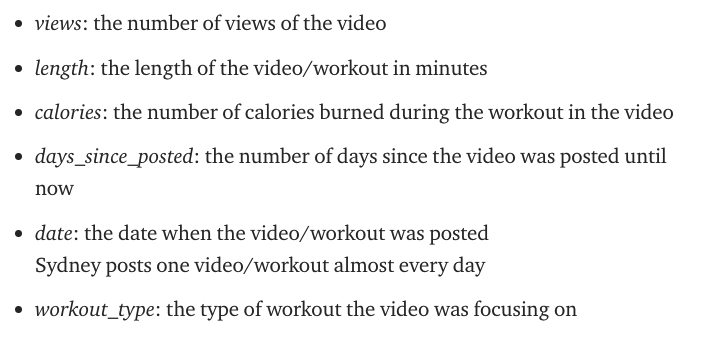

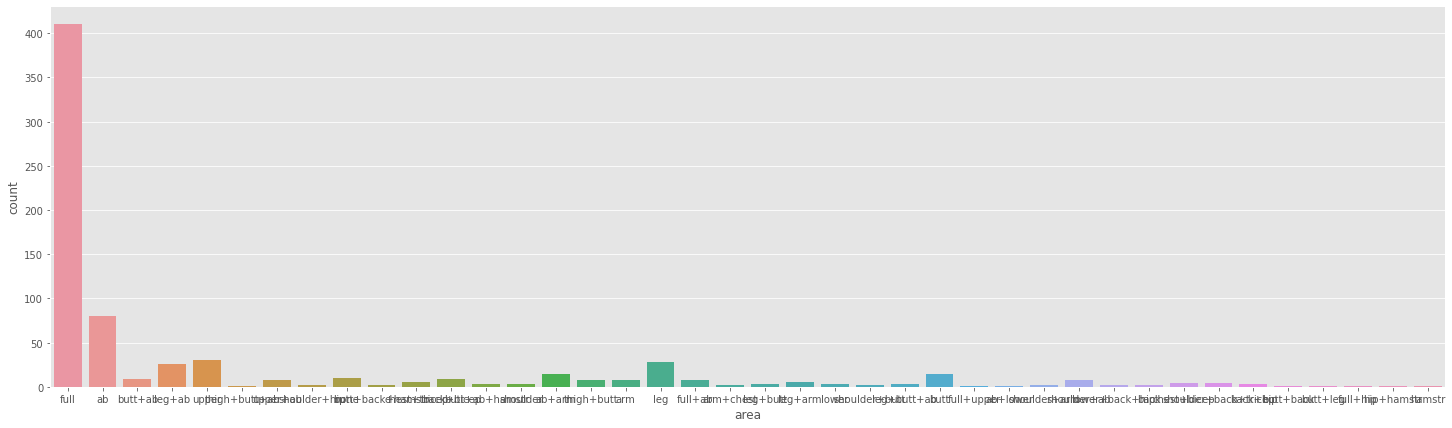

In [5]:
df_non_numeric = df.select_dtypes(exclude='number')
df_non_numeric
plt.figure(figsize=(25,7))
sns.countplot(x="area",
            data=df_non_numeric)

In [6]:
df_non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 728
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   title                        729 non-null    object        
 1   posted_ago                   729 non-null    object        
 2   link                         729 non-null    object        
 3   date                         729 non-null    datetime64[ns]
 4   title_word_set               729 non-null    object        
 5   area                         729 non-null    object        
 6   workout_type                 729 non-null    object        
 7   is_butt_area                 729 non-null    bool          
 8   is_core_area                 729 non-null    bool          
 9   is_booti_area                729 non-null    bool          
 10  is_shoulder_area             729 non-null    bool          
 11  is_lower_area                729 non-null    

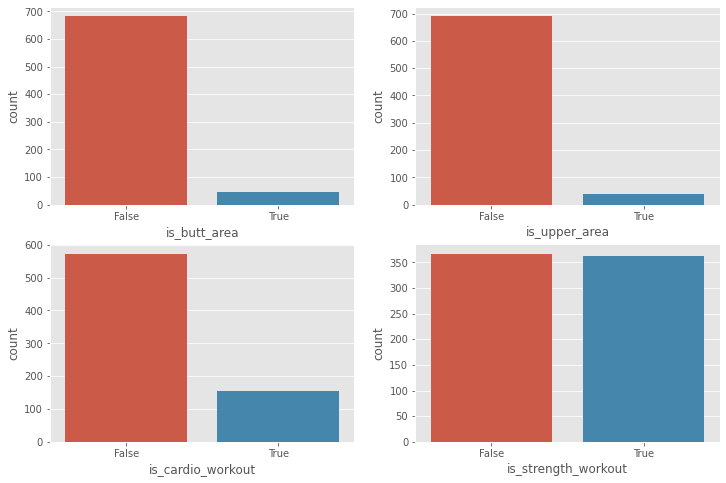

In [9]:
# this plots multiple seaborn countplots on different subplots.
# 
def plot_multiple_countplots(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    axs = axs.ravel()
    for col, ax in zip(cols, axs):
      sns.countplot(x=df[col], ax=ax)

 #   for ind, col in enumerate(cols):
 #       i = math.floor(ind/num_cols)
 #       j = ind - i*num_cols
 #       
 #       if num_rows == 1:
 #           if num_cols == 1:
 #               sns.countplot(x=df[col], ax=axs)
 #           else:
 #               sns.countplot(x=df[col], ax=axs[j])
 #       else:
 #           sns.countplot(x=df[col], ax=axs[i, j])
            
            
plot_multiple_countplots(df_non_numeric, ['is_butt_area', 'is_upper_area', 'is_cardio_workout', 'is_strength_workout'])

### Relación entre 2 Variables Categóricas

> Cuales son los tipos de entrenamiento por área más populares en el canal?

In [10]:
df.groupby(['area', 'workout_type']).size()

area      workout_type   
ab        cardio             25
          hiit                5
          hiit+cardio         9
          none                1
          strength           25
                             ..
upper     cardio              8
          hiit+cardio         2
          strength           17
          strength+cardio     3
upper+ab  strength            8
Length: 89, dtype: int64

In [12]:
df['area'].value_counts()[:5]

full      410
ab         80
upper      30
leg        28
leg+ab     26
Name: area, dtype: int64

In [20]:
~np.array([True, False])

array([False,  True])

In [13]:
top6 = list(df['area'].value_counts().index[:5])
df['area2'] = df['area']

print(top6)

top4 = list(df['workout_type'].value_counts().index[:3])
df['workout_type2'] = df['workout_type']

print(top4)

msk = df['area2'].isin(top6)
df.loc[~msk, 'area2'] = 'Other'

msk = df['workout_type2'].isin(top4)
df.loc[~msk, 'workout_type2'] = 'Other'

['full', 'ab', 'upper', 'leg', 'leg+ab']
['strength', 'hiit', 'stretch']


In [15]:
df[['area2', 'workout_type2']]

,area2,workout_type2
0,full,hiit
1,full,Other
2,ab,strength
3,full,hiit
4,full,strength
...,...,...
724,upper,Other
725,leg,strength
726,full,Other
727,full,stretch


In [25]:
df['area2'].value_counts().index

Index(['full', 'Other', 'ab', 'upper', 'leg', 'leg+ab'], dtype='object')

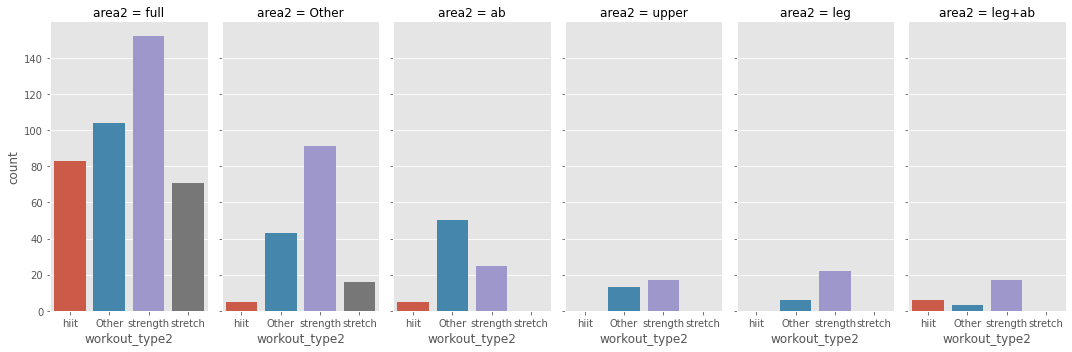

In [26]:
order = df['area2'].value_counts().index # order the columns from highest count to lowest.
g = sns.catplot(x="workout_type2",
            col='area2',
            col_order=order,
            kind="count", data=df,
            aspect=0.5)

#### A ver nomás por acordarnos...
### Scatter

> Cuál sería la mejor duración de videos para obtener más vistas?

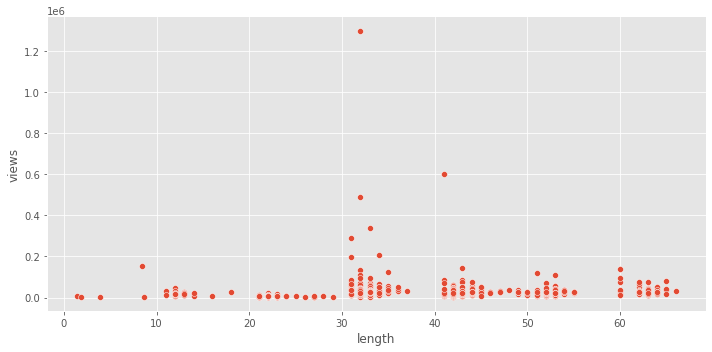

In [27]:
sns.relplot(x='length', y='views', data=df, aspect=2.0)

### BOXPLOTS

> A box plot (box-and-whisker plot) is a standardized way of displaying the dataset based on a five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.


> are useful visualizations when comparing groups of categories together.



>Wikipedia

In [31]:
df['date'].dt.dayofweek.replace(to_replace=to_replace)

0      Thursday
1       Tuesday
2      Thursday
3        Sunday
4        Monday
         ...   
724    Thursday
725      Friday
726    Saturday
727      Sunday
728      Monday
Name: date, Length: 729, dtype: object

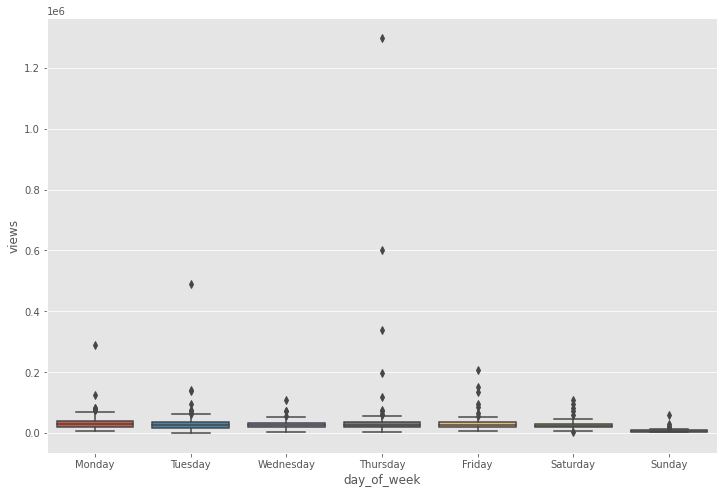

In [32]:
to_replace = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_week_num'] = df['date'].dt.dayofweek
df['day_of_week'] = df['day_of_week_num'].replace(to_replace=to_replace)

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.boxplot(x="day_of_week", y="views", data=df, order=order)

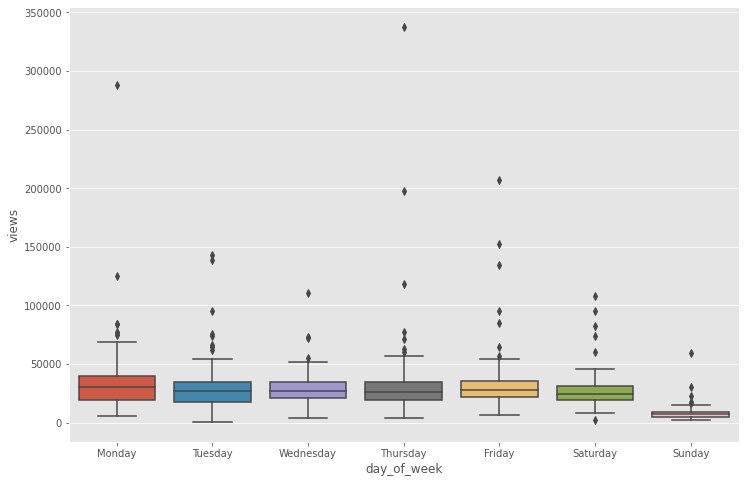

In [41]:
msk = df['views'] < 400000
sns.boxplot(x="day_of_week", y="views", data=df[msk], order=order)

#### En algunos días de la semana incrementan las vistas por tipo de entrenamiento?

#### 2 Variables categorica y una numerica

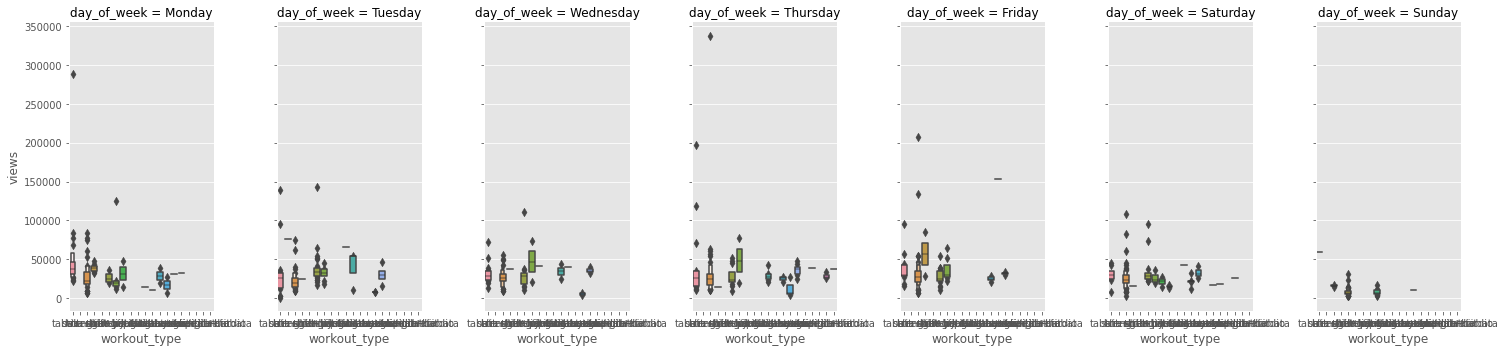

In [37]:
sns.catplot(x="workout_type", y="views",
            col="day_of_week", aspect=.6,
            kind="boxen", data=df[msk], col_order=order);

In [42]:
df['workout_type'].value_counts()


strength                324
hiit                     99
stretch                  87
cardio                   82
hiit+cardio              28
tabata+cardio            20
strength+hiit            16
tabata                   14
yoga                     13
none                     11
strength+cardio          10
pilat+cardio              8
pilat                     6
cardio+hiit               4
tabata+hiit+cardio        2
strength+tabata           1
tabata+pilat+cardio       1
strength+hiit+cardio      1
yoga+pilat                1
tabata+hiit               1
Name: workout_type, dtype: int64

In [43]:
top4 = list(df['workout_type'].value_counts().index[:3])
df['workout_type2'] = df['workout_type']

msk = df['workout_type2'].isin(top4)
df.loc[~msk, 'workout_type2'] = 'Other'

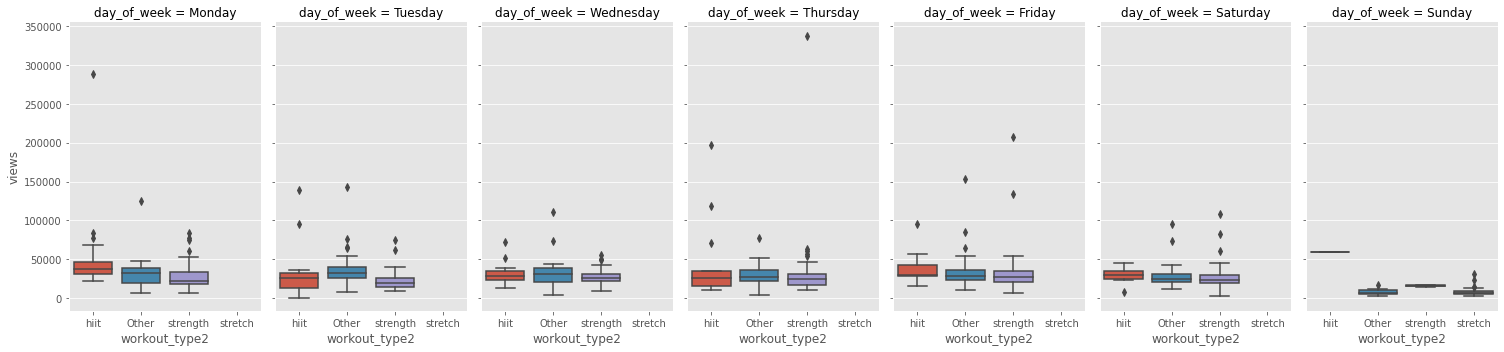

In [44]:

msk = df['views'] < 400000

sns.catplot(x="workout_type2", y="views",
            col="day_of_week",
            kind="box", data=df[msk], col_order=order,
            aspect=0.6)

### STRIPPLOT

> A swarm plot is a categorical scatterplot where the points are adjusted (only along the categorical axis) so that they don’t overlap.


> This gives a better representation of the distribution of values.



>seaborn documentation

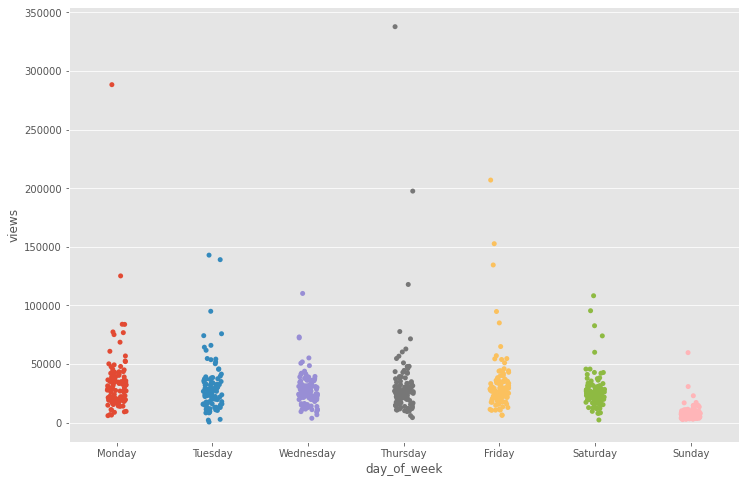

In [45]:
sns.stripplot(x="day_of_week", y="views", data=df[msk], order=order)

### Heatmaps

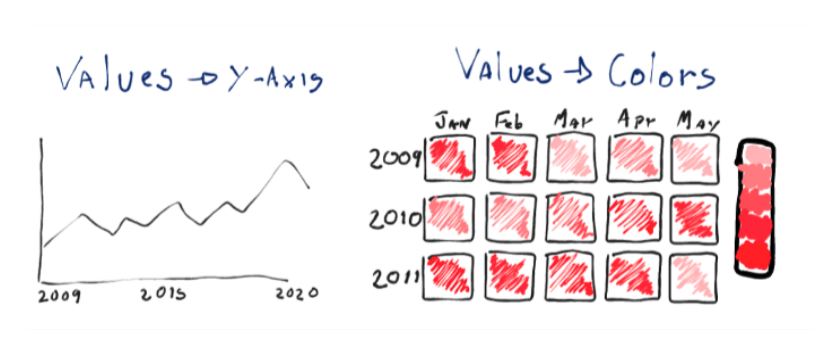

In [56]:
df_area_workout.pivot(index='area', columns='workout_type', values='views').fillna(0)

workout_type,cardio,cardio+hiit,hiit,hiit+cardio,none,pilat,pilat+cardio,strength,strength+cardio,strength+hiit,strength+hiit+cardio,strength+tabata,stretch,tabata,tabata+cardio,tabata+hiit,tabata+hiit+cardio,tabata+pilat+cardio,yoga,yoga+pilat
area,,,,,,,,,,,,,,,,,,,,
ab,843439.0,0.0,168431.0,350337.0,26964.0,0.0,0.0,723702.0,25972.0,0.0,0.0,0.0,0.0,27177.0,342929.0,0.0,49927.0,26277.0,0.0,0.0
ab+arm,54853.0,0.0,23004.0,0.0,0.0,0.0,0.0,329031.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ab+lower,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26837.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
arm,24104.0,0.0,0.0,0.0,0.0,0.0,0.0,122758.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
arm+chest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68959.0,0.0,0.0,0.0,0.0,0.0,0.0
back,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15571.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
back+bicep,58347.0,0.0,0.0,41100.0,0.0,0.0,0.0,49099.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
back+hip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29129.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
butt,47313.0,0.0,0.0,0.0,0.0,0.0,0.0,260781.0,0.0,0.0,0.0,0.0,0.0,0.0,105686.0,0.0,0.0,0.0,0.0,0.0


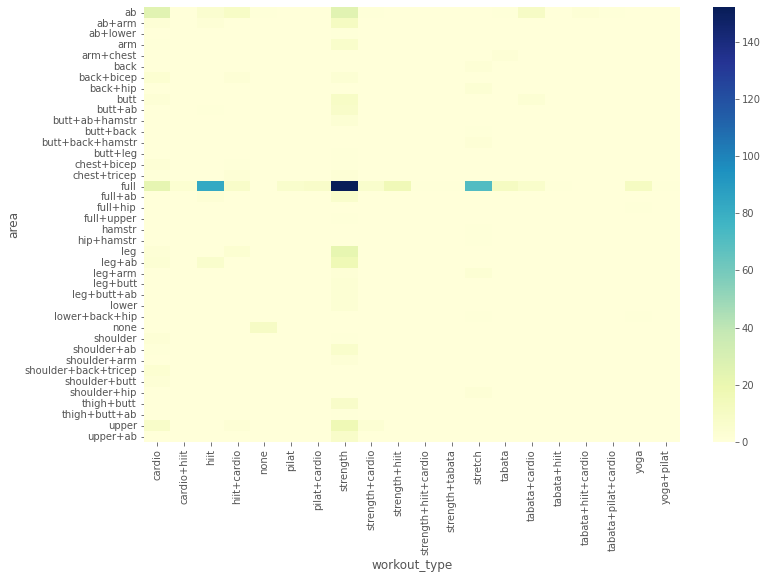

In [60]:
df_area_workout = df.groupby(['area', 'workout_type'])['views'].count().reset_index()
df_area_workout_pivot = df_area_workout.pivot(index='area', columns='workout_type', values='views').fillna(0)
sns.heatmap(df_area_workout_pivot, annot=False, fmt='.0f', cmap="YlGnBu")

In [64]:
# read file
dolar = pd.read_csv('data/Foreign_Exchange_Rates.csv', 
                 usecols=[1,7], names=['DATE', 'CAD_USD'], 
                 skiprows=1, index_col=0, parse_dates=[0])
dolar

,CAD_USD
DATE,
2000-01-03,1.4465
2000-01-04,1.4518
2000-01-05,1.4518
2000-01-06,1.4571
2000-01-07,1.4505
...,...
2019-12-25,ND
2019-12-26,1.3124
2019-12-27,1.3073


In [66]:
dolar['CAD_USD'] = pd.to_numeric(dolar.CAD_USD, errors='coerce')
dolar.dropna(inplace=True)
dolar

,CAD_USD
DATE,
2000-01-03,1.4465
2000-01-04,1.4518
2000-01-05,1.4518
2000-01-06,1.4571
2000-01-07,1.4505
...,...
2019-12-24,1.3160
2019-12-26,1.3124
2019-12-27,1.3073


In [67]:
# create a copy of the dataframe, and add columns for month and year
dolar_m = dolar.copy()
dolar_m['month'] = [i.month for i in dolar_m.index]
dolar_m['year'] = [i.year for i in dolar_m.index]
# group by month and year, get the average
dolar_m = dolar_m.groupby(['month', 'year']).mean()
dolar_m

CAD_USD
month year          
1     2000  1.448600
      2001  1.503200
      2002  1.599714
      2003  1.541448
      2004  1.295755
...              ...
12    2015  1.371255
      2016  1.333919
      2017  1.276870
      2018  1.343611
      2019  1.316895

[240 rows x 1 columns]

In [68]:
dolar_m = dolar_m.unstack(level=0)
dolar_m

CAD_USD                      ...                              
month        1         2         3   ...        10        11        12
year                                 ...                              
2000   1.448600  1.451210  1.460774  ...  1.512476  1.542638  1.521875
2001   1.503200  1.521563  1.558741  ...  1.571677  1.592245  1.578755
2002   1.599714  1.596400  1.587743  ...  1.578009  1.571453  1.559219
2003   1.541448  1.512147  1.476081  ...  1.322095  1.313044  1.312755
2004   1.295755  1.329895  1.328578  ...  1.246935  1.196770  1.218883
2005   1.224835  1.240053  1.216026  ...  1.177415  1.181545  1.161481
2006   1.157165  1.148895  1.157309  ...  1.128538  1.135881  1.153235
2007   1.176262  1.170989  1.168159  ...  0.975413  0.967238  1.002070
2008   1.009943  0.998555  1.002943  ...  1.184695  1.217094  1.233695
2009   1.224820  1.245200  1.264518  ...  1.054676  1.059300  1.053691
2010   1.043811  1.057211  1.022900  ...  1.017900  1.012900  1.008062
2011   0.993945  0.987637  0.976561  ...  1.019800  1.024755  1.023524
2012   1.012985  0.996745  0.993773  ...  0.987155  0.996970  0.989820
2013   0.992057  1.009784  1.024424  ...  1.036282  1.048642  1.063919
2014   1.094010  1.105442  1.110681  ...  1.121155  1.132539  1.153162
2015   1.212190  1.249905  1.261832  ...  1.307224  1.327853  1.371255
2016   1.420811  1.379690  1.322639  ...  1.325095  1.343415  1.333919
2017   1.318305  1.310916  1.338700  ...  1.260690  1.277335  1.276870
2018   1.242905  1.258821  1.293255  ...  1.300441  1.320480  1.343611
2019   1.330045  1.320872  1.337052  ...  1.318923  1.323658  1.316895

[20 rows x 12 columns]

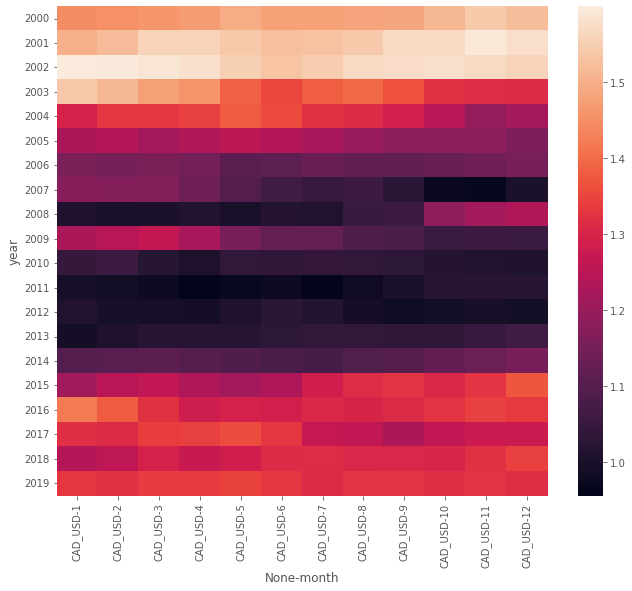

In [69]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(dolar_m)
plt.show()


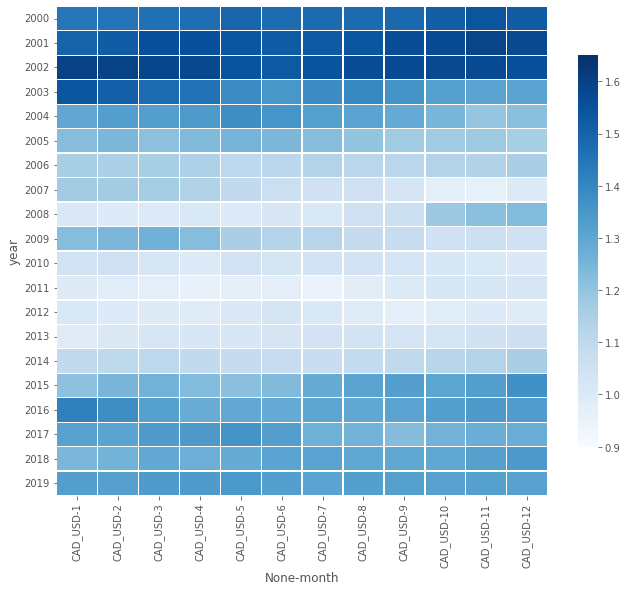

In [70]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sns.heatmap(dolar_m, cmap="Blues", vmin= 0.9, vmax=1.65,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

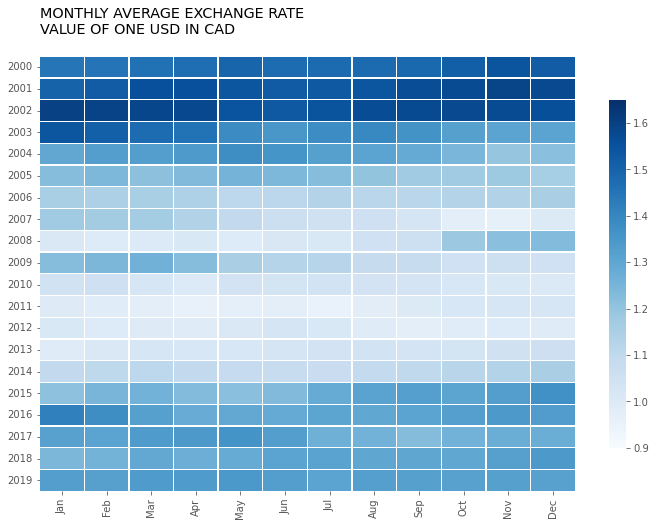

In [73]:
# xticks
sns.heatmap(dolar_m, cmap="Blues", vmin= 0.9, vmax=1.65,
           linewidth=0.3, cbar_kws={"shrink": .8})
ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)


# axis labels
plt.xlabel('')
plt.ylabel('')

# title
title = 'monthly Average exchange rate\nValue of one USD in CAD\n'.upper()
plt.title(title, loc='left')

plt.show()

### HeatMap como Matriz de Correlación

!['dwight_correlation'](https://media.makeameme.org/created/correlation-implies-causation-17eb876840.jpg)


In [74]:
df = pd.read_csv('data/cereal.csv')
# get correlations
df_corr = df.corr()
df_corr
# irrelevant fields
fields = ['rating', 'shelf', 'cups', 'weight']
# drop rows
df_corr.drop(fields, inplace=True)
# drop cols
df_corr.drop(fields, axis=1, inplace=True)
df_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


In [76]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

In [79]:
mask[1:, :-1]

array([[False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

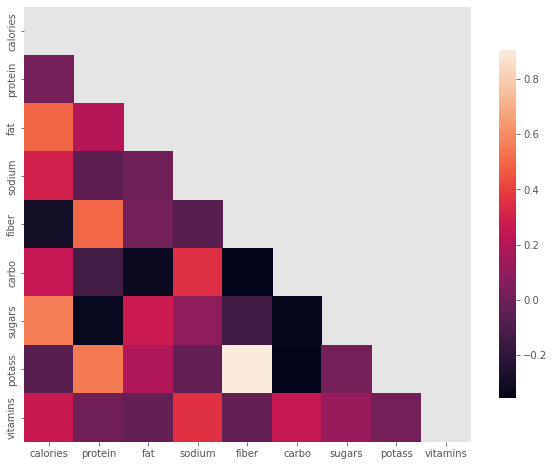

In [77]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, mask=mask, cbar_kws={"shrink": .8})
plt.show()


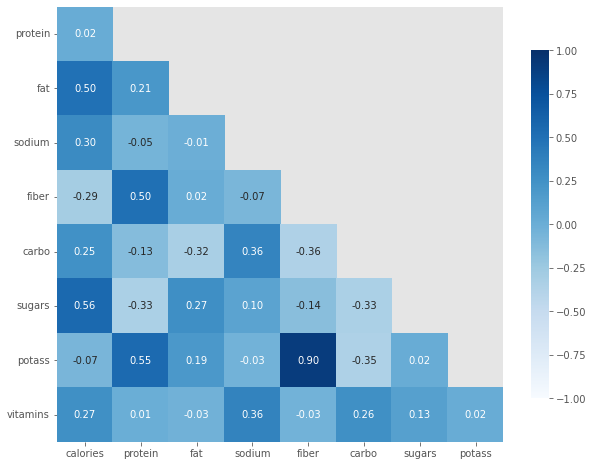

In [81]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [84]:
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

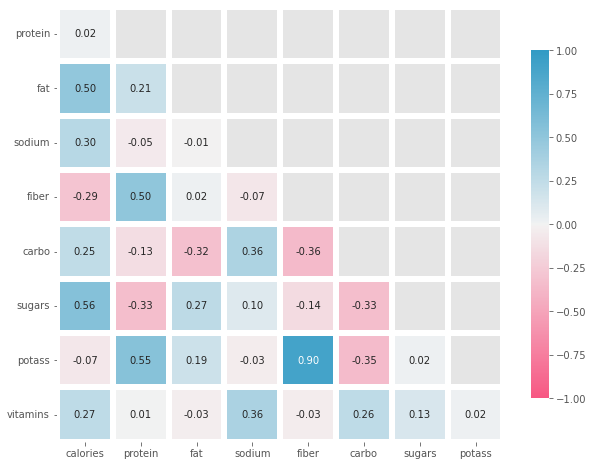

In [85]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap, linewidths=5,
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


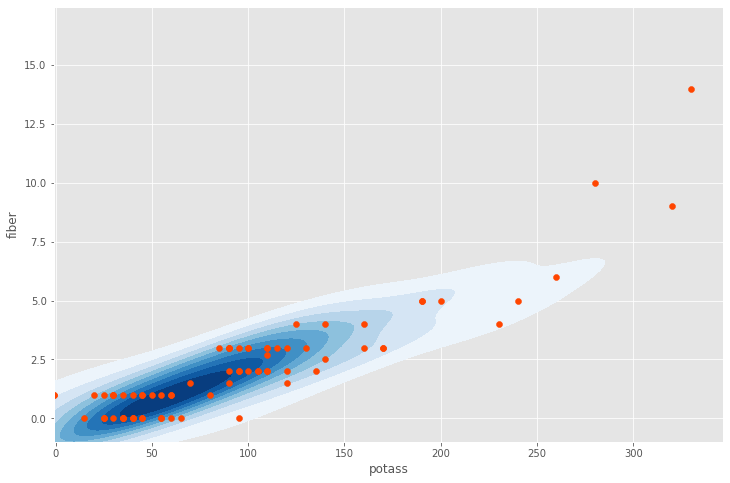

In [86]:
fig, ax = plt.subplots(1, figsize=(12,8))
sns.kdeplot(df.potass, df.fiber, cmap='Blues',
           shade=True, clip=(-1,300))
plt.scatter(df.potass, df.fiber, color='orangered')

### Dendograma

> El objetivo es agrupar las entidades para mostrar quién comparte similitudes con quién.


> El dendrograma acercará las entidades similares entre sí en el árbol.

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

In [91]:
data = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv', index_col=0)
data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [92]:
Z = linkage(data, 'centroid')
Z

array([[  0.        ,   1.        ,   0.61532512,   2.        ],
       [ 11.        ,  12.        ,   0.98264948,   2.        ],
       [  9.        ,  10.        ,   1.52315462,   2.        ],
       [ 13.        ,  33.        ,   1.72826503,   3.        ],
       [ 17.        ,  25.        ,   5.14734155,   2.        ],
       [ 20.        ,  26.        ,   8.6535903 ,   2.        ],
       [ 19.        ,  36.        ,   8.83458438,   3.        ],
       [  6.        ,  23.        ,  10.07612029,   2.        ],
       [  2.        ,  37.        ,  12.3127599 ,   3.        ],
       [ 18.        ,  38.        ,  13.79640785,   4.        ],
       [ 21.        ,  22.        ,  14.01549946,   2.        ],
       [ 32.        ,  34.        ,  15.45799328,   4.        ],
       [ 14.        ,  15.        ,  15.62244462,   2.        ],
       [ 31.        ,  40.        ,  16.24371716,   4.        ],
       [ 28.        ,  39.        ,  19.70061801,   3.        ],
       [  8.        ,  45

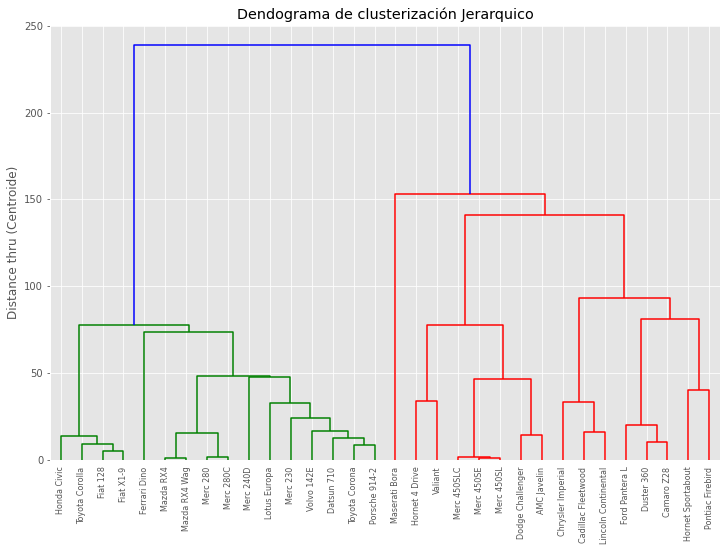

In [93]:
# Plot title
plt.title('Dendograma de clusterización Jerarquico')

# Plot axis labels
plt.xlabel('')
plt.ylabel('Distance thru (Centroide)')

# Make the dendrogram
dendrogram(Z, labels=data.index, leaf_rotation=90)

# Show the graph
plt.show()

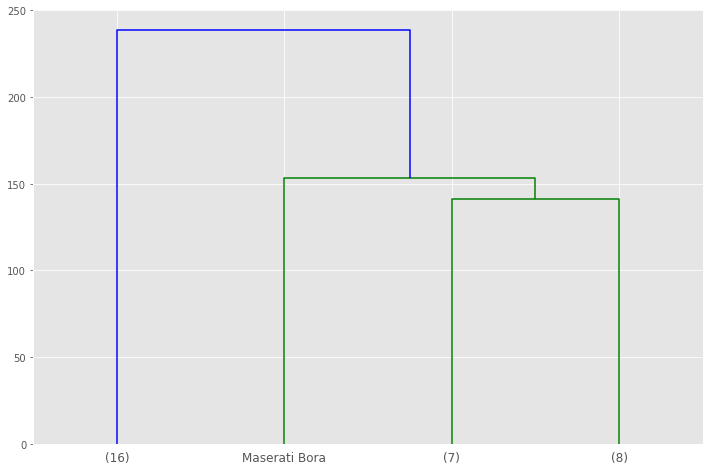

In [96]:
# method 1: lastp
hierarchy.dendrogram(Z, labels=data.index, truncate_mode = 'lastp', p=4 ) # -> you will have 4 leaf at the bottom of the plot
plt.show()

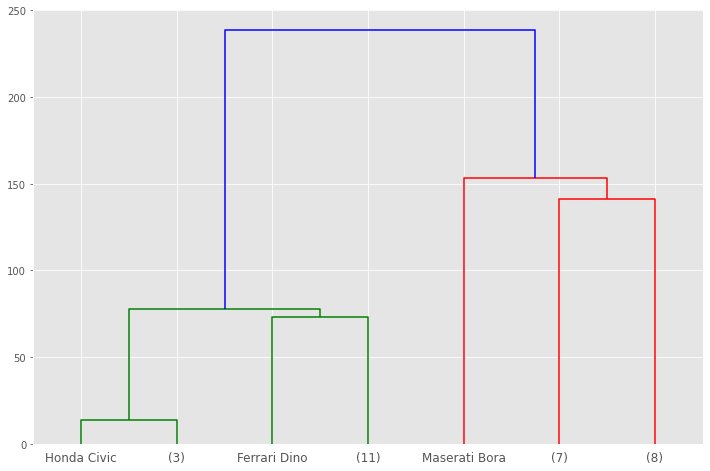

In [100]:
hierarchy.dendrogram(Z, labels=data.index, truncate_mode = 'level', p=2) # -> No more than ``p`` levels of the dendrogram tree are displayed.
plt.show()

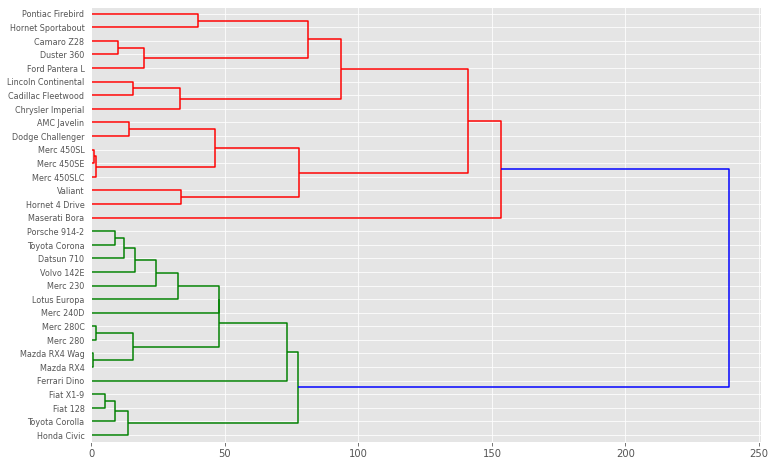

In [101]:
hierarchy.dendrogram(Z, orientation="right", labels=data.index)
plt.show()


### Treemap

Fue creado en los 90's por 

#### Ben Shneiderman profe de la universidad de Maryland


> Ees una visualización basada en rectángulos que le permite representar un conjunto de datos ordenado jerárquicamente (estructurado en árbol). 


> La idea conceptual es comparar cantidades y mostrar patrones de alguna estructura jerárquica en un espacio físicamente restringido. Para ello, se utilizan rectángulos de diferentes tamaños y colores para mostrar el conjunto de datos desde diferentes perspectivas.

![ben_treemap](https://miro.medium.com/max/1400/0*p_uZc3SKPn49_AzL.jpeg)

In [102]:
!pip install squarify

In [103]:
import squarify

In [106]:
animals = pd.read_csv('data/animals.csv')
# convert to numeric and drop na
animals['Number of Animals'] = pd.to_numeric(animals['Number of Animals'], errors='coerce')
animals.dropna(inplace=True)
animals.head()
animals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Breed              222 non-null    object 
 1   Number of Animals  222 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.2+ KB


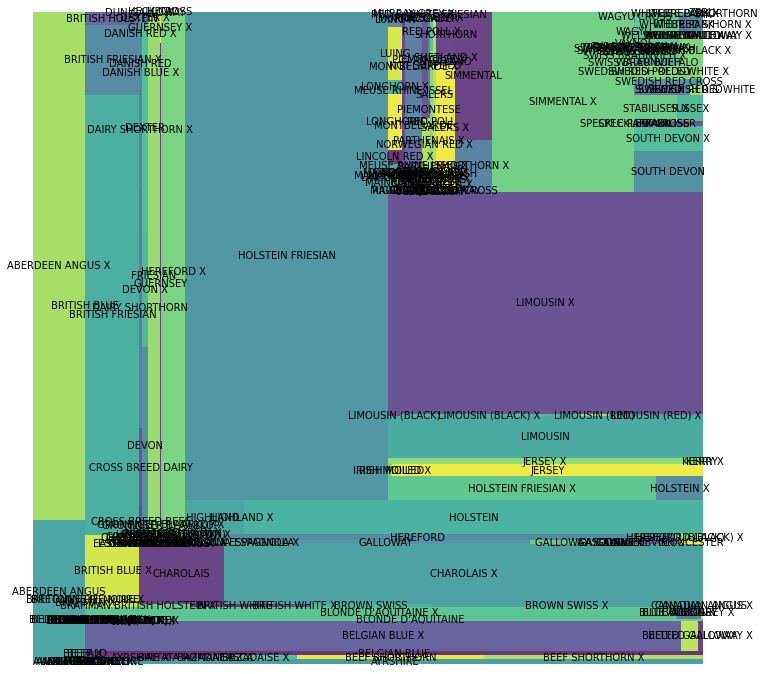

In [107]:
fig, ax = plt.subplots(1, figsize = (12,12))
squarify.plot(sizes=animals['Number of Animals'], 
              label=animals['Breed'], 
              alpha=.8 )
plt.axis('off')
plt.show()

In [109]:
animals.sort_values('Number of Animals', ascending=False, inplace=True)
animals

,Breed,Number of Animals
114,HOLSTEIN FRIESIAN,1958397.0
128,LIMOUSIN X,1382696.0
57,CHAROLAIS X,564074.0
1,ABERDEEN ANGUS X,516932.0
182,SIMMENTAL X,506397.0
...,...,...
26,BLACK POLL,1.0
43,BRETONNE PIE-NOIRE X,1.0
27,BLACK POLL X,1.0
102,HECK CROSS,1.0


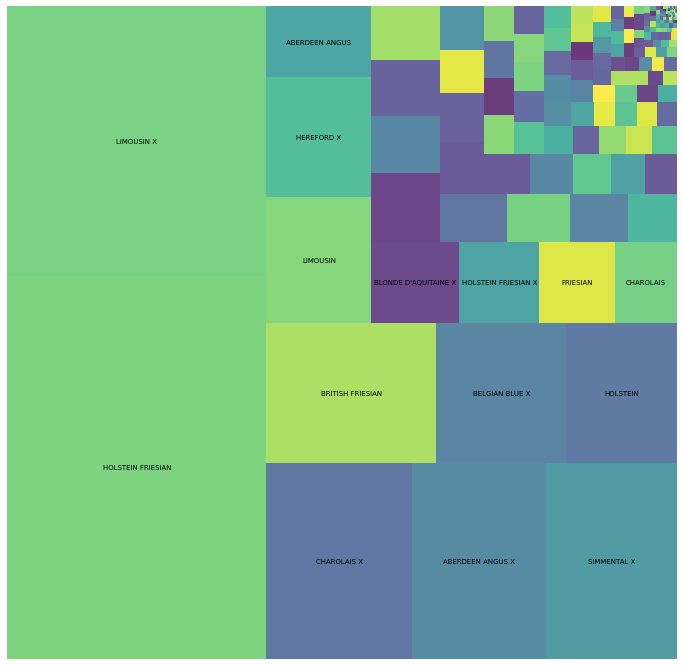

In [110]:
fig, ax = plt.subplots(1, figsize = (12,12))
squarify.plot(sizes=animals['Number of Animals'], 
              label=animals['Breed'][:15], 
              alpha=.8, text_kwargs={'fontsize':7} )
plt.axis('off')
plt.show()

In [111]:
nasdaq = pd.read_csv('https://raw.githubusercontent.com/hashABCD/Publications/main/Medium/Treemap%20in%20python/market_cap_top20.csv')
nasdaq.head()

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,1,AAPL,Apple Inc.,Technology,Consumer Electronics,USA,2165.05B,29.22,130.21,0.36%,"7,83,39,673"
1,2,MSFT,Microsoft Corporation,Technology,Software - Infrastructure,USA,1880.86B,34.36,252.46,1.09%,"2,69,92,758"
2,3,AMZN,"Amazon.com, Inc.",Consumer Cyclical,Internet Retail,USA,1667.50B,62.64,3291.61,-0.45%,"47,02,758"
3,4,GOOG,Alphabet Inc.,Communication Services,Internet Content & Information,USA,1646.62B,31.97,2398.69,0.73%,"11,61,766"
4,5,GOOGL,Alphabet Inc.,Communication Services,Internet Content & Information,USA,1580.64B,30.38,2351.93,0.62%,"14,44,167"


In [112]:
nasdaq['Market Cap']=nasdaq['Market Cap'].apply(lambda x: float(str(x).replace('B','')))
nasdaq.Change=nasdaq.Change.apply(lambda x:float(str(x).replace('%','')))
nasdaq.Volume=nasdaq.Volume.apply(lambda x:int(str(x).replace(',','')))

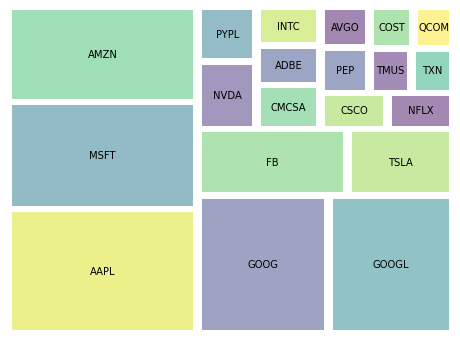

In [113]:
plt.figure(figsize=(8,6))
squarify.plot(nasdaq['Market Cap'], label=nasdaq.Ticker, alpha=0.5, pad=True)
plt.axis('off')
plt.show()

In [114]:
cmap=matplotlib.cm.RdYlGn
norm=matplotlib.colors.Normalize(vmin=nasdaq.Change.min(), vmax=nasdaq.Change.max())
colors=[cmap(norm(i)) for i in nasdaq.Change]

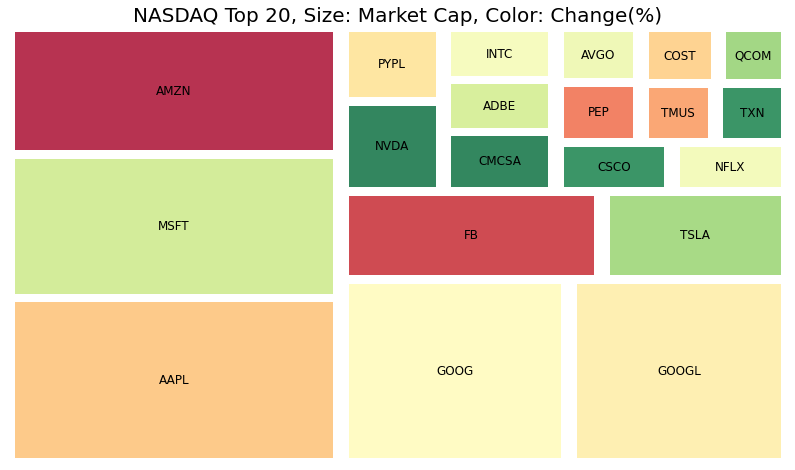

In [115]:
plt.figure(figsize=(14,8))
title='NASDAQ Top 20, Size: Market Cap, Color: Change(%)'
plt.title(title, size=20)

squarify.plot(nasdaq['Market Cap'], label=nasdaq.Ticker,alpha=0.8, color=colors, pad=True, 
              text_kwargs={'color':'black', 'size':12})

plt.axis('off')
plt.show()

In [116]:
!pip install plotly

In [120]:
!pip install "jupyterlab>=1.0" jupyterlab-dash==0.1.0a3

In [121]:
import plotly.express as px

AttributeError: ignored

In [122]:
vgsales = pd.read_csv('data/vgsales.csv')
vgsales.dropna(inplace=True)
vgsales

FileNotFoundError: ignored

In [ ]:
fig = px.treemap(vgsales, 
                 path=['Platform', 'Genre'], 
                 values='Global_Sales',
                 color='NA_Sales'
                )
fig.show()

In [ ]:
import plotly.express as px
fig = px.treemap(
    names = ["Eve","Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents = ["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve"]
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### WORDCLOUD

In [123]:
!pip install wordcloud

In [124]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

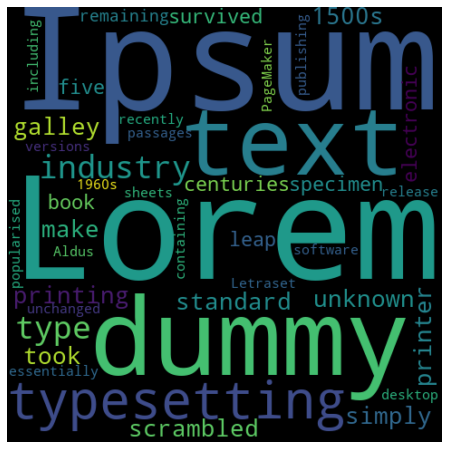

In [125]:
# Create a list of word
text=("Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [126]:
import numpy as np
from PIL import Image
from os import path
import os
import random

In [127]:

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [128]:
d = os.getcwd()
d

'/content'

In [129]:
mask = np.array(Image.open(path.join(d, "assets/stormtrooper_mask.png")))

In [131]:
text = open(path.join(d, 'data/a_new_hope.txt')).read()
text

'\n\n                                        STAR WARS\n\n                                        Episode IV\n\n                                        A NEW HOPE\n\n                                         From the\n                                  JOURNAL OF THE WHILLS\n\n                                            by\n                                       George Lucas\n\n                                   Revised Fourth Draft\n                                     January 15, 1976\n\n                                      LUCASFILM LTD.\n\n                \n\n               A long time ago, in a galaxy far, far, away...\n\n               A vast sea of stars serves as the backdrop for the main title. \n               War drums echo through the heavens as a rollup slowly crawls \n               into infinity.\n\n                    It is a period of civil war. Rebel spaceships, \n                    striking from a hidden base, have won their first \n                    victory agains

In [132]:
text = text.replace("HAN", "Han")
text = text.replace("LUKE'S", "Luke")

In [133]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [135]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)

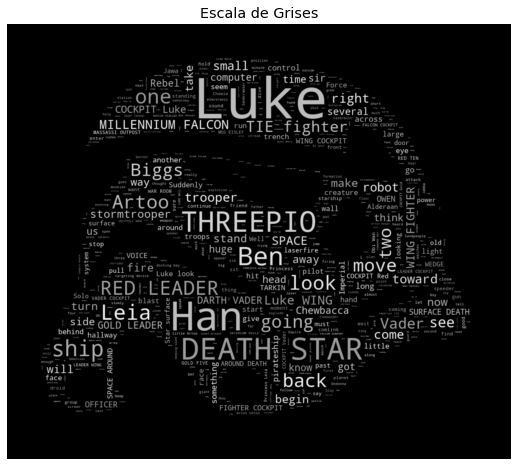

In [136]:
default_colors = wc.to_array()
plt.grid(False)
plt.axis("off")
plt.title("Escala de Grises")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")

In [137]:
wc.to_file("Episode4.png")


In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import collections
import csv
import datetime

import tweepy
import nltk
from nltk.corpus import stopwords
import re

In [139]:
# Pass OAuth details to tweepy's OAuth handler

%store -r access_token
%store -r access_token_secret
%store -r api_key
%store -r api_key_secret

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth)

no stored variable access_token
no stored variable access_token_secret
no stored variable api_key
no stored variable api_key_secret


NameError: ignored

In [ ]:
search_term = "#elon+musk -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2021-05-01').items(500)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

In [ ]:
all_tweets_no_urls[0].lower().split()

In [ ]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet

In [ ]:
all_words_no_urls = list(itertools.chain(*words_in_tweet))
all_words_no_urls


In [ ]:
sentence = ' '.join(all_words_no_urls)
sentence

In [ ]:
mask = np.array(Image.open(path.join(d, "Bitcoin.png")))

In [ ]:
wc_elon = WordCloud(max_words=100000, mask=mask, margin=10,
               random_state=1).generate(sentence)

In [ ]:
default_colors = wc_elon.to_array()
plt.title("Crypto Tweets")
plt.imshow(wc_elon.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")